# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Nothing else, you are to use **Matplotlib** and **matplotlib** **only** !!
3. Make the best presentation possible.


Best of luck !!

![](https://media.tenor.com/LyLjvOKNGoEAAAAd/good-luck-friend.gif)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly as pl
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('chouse.csv',low_memory=False)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
latitude = df['latitude']
longitude = df['longitude']

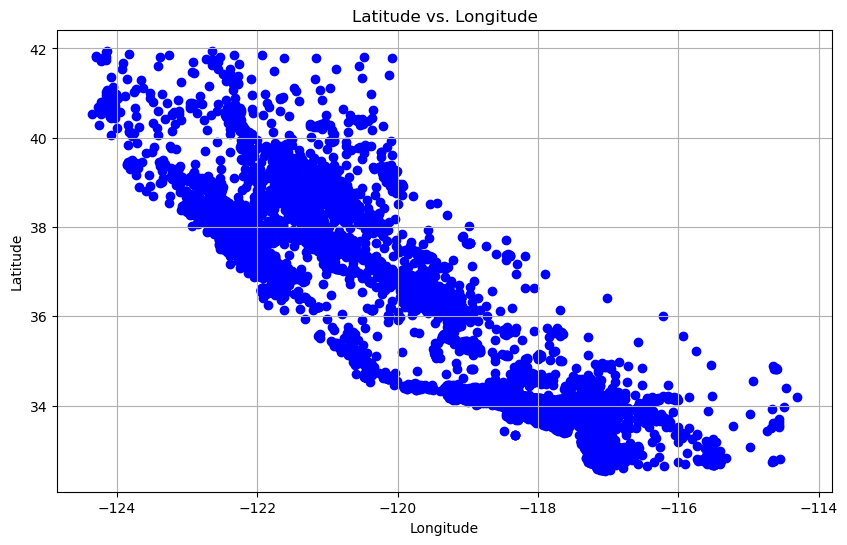

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='b', marker='o')
plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [8]:
median_house_value = df['median_house_value']


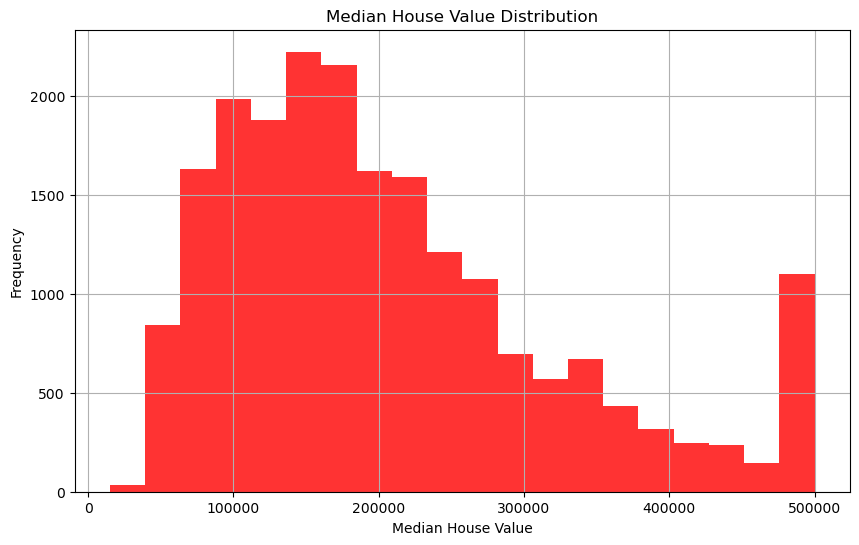

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(median_house_value, bins=20, color='r', alpha=0.8)
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
ocean_proximity = df['ocean_proximity'].value_counts()

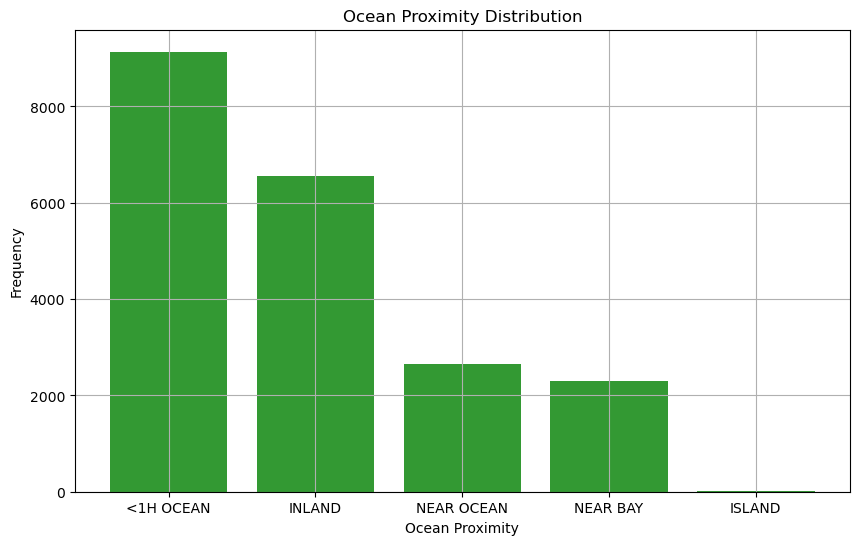

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(ocean_proximity.index, ocean_proximity.values, color='g', alpha=0.8)
plt.title('Ocean Proximity Distribution')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

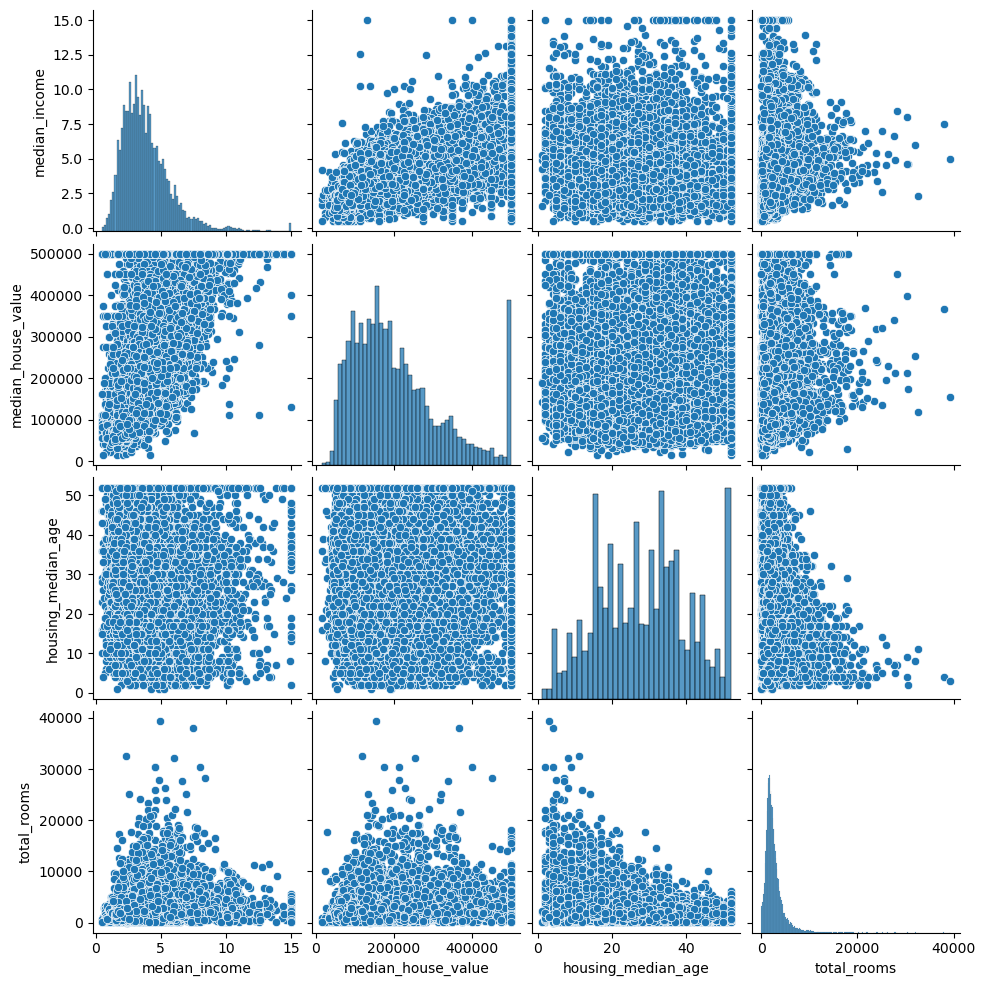

In [12]:
sns.pairplot(data=df[["median_income", "median_house_value", "housing_median_age", "total_rooms"]])


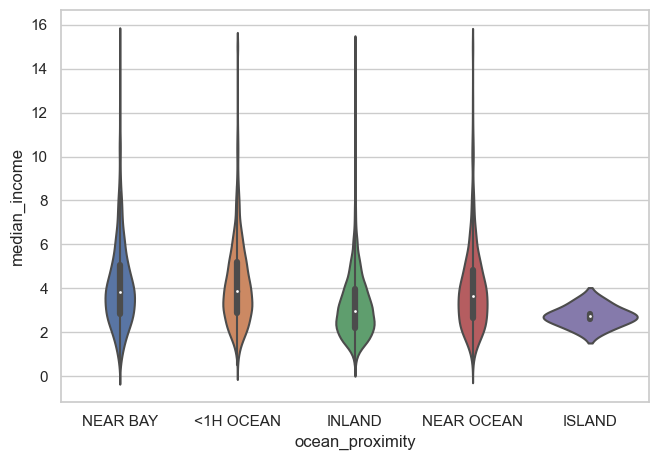

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))  # Set the figure size
sns.violinplot(data=df, x="ocean_proximity", y="median_income", height=4, aspect=1.5)
plt.show()



In [13]:
corr_matrix = df.corr()

Text(0.5, 1.0, 'Heatmap of Correlations')

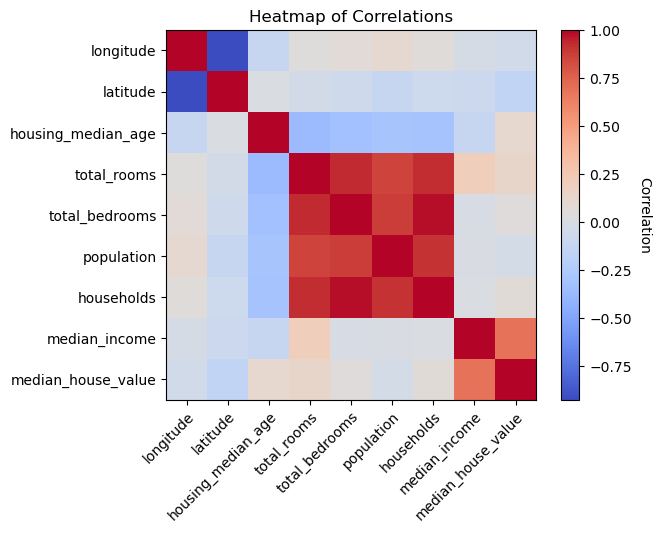

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=-90, va='bottom')
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title('Heatmap of Correlations')

In [15]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

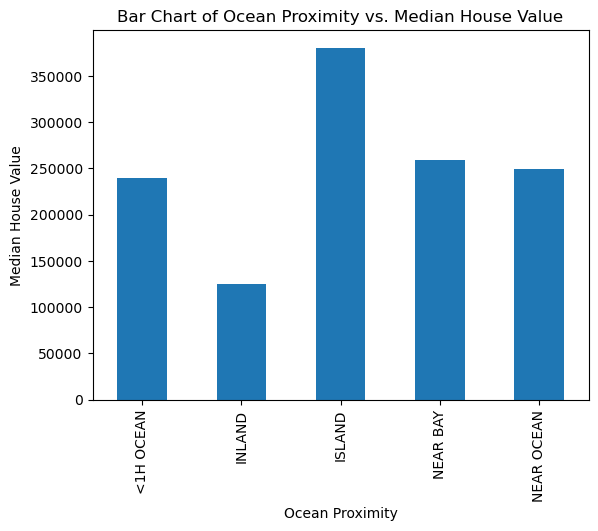

In [16]:
df.groupby('ocean_proximity')['median_house_value'].mean().plot(kind='bar')
plt.title('Bar Chart of Ocean Proximity vs. Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

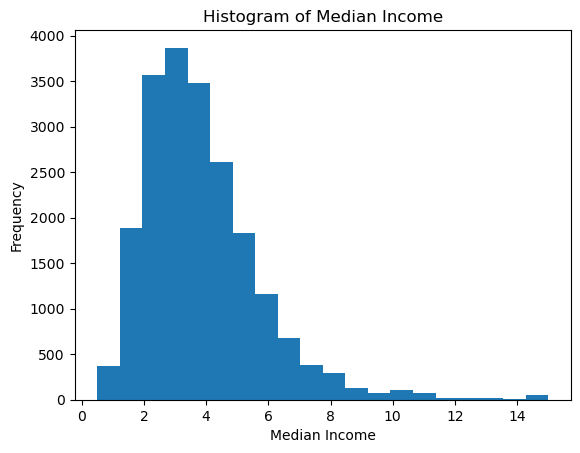

In [17]:
plt.hist(df['median_income'], bins=20)
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

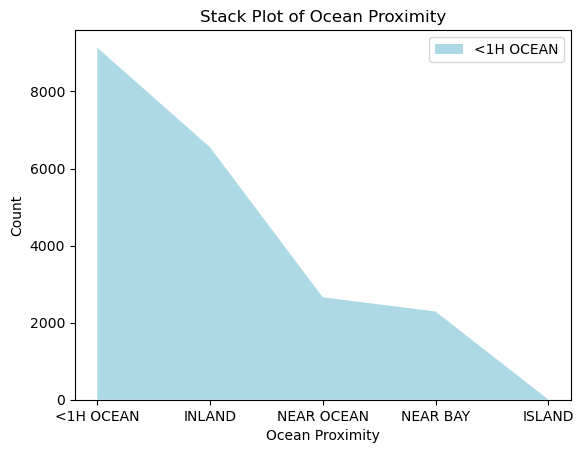

In [18]:

ocean_proximity_counts = df['ocean_proximity'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'purple']

fig, ax = plt.subplots()
ax.stackplot(ocean_proximity_counts.index, ocean_proximity_counts.values, labels=ocean_proximity_counts.index,colors=colors)
ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.set_title('Stack Plot of Ocean Proximity')
ax.legend()


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

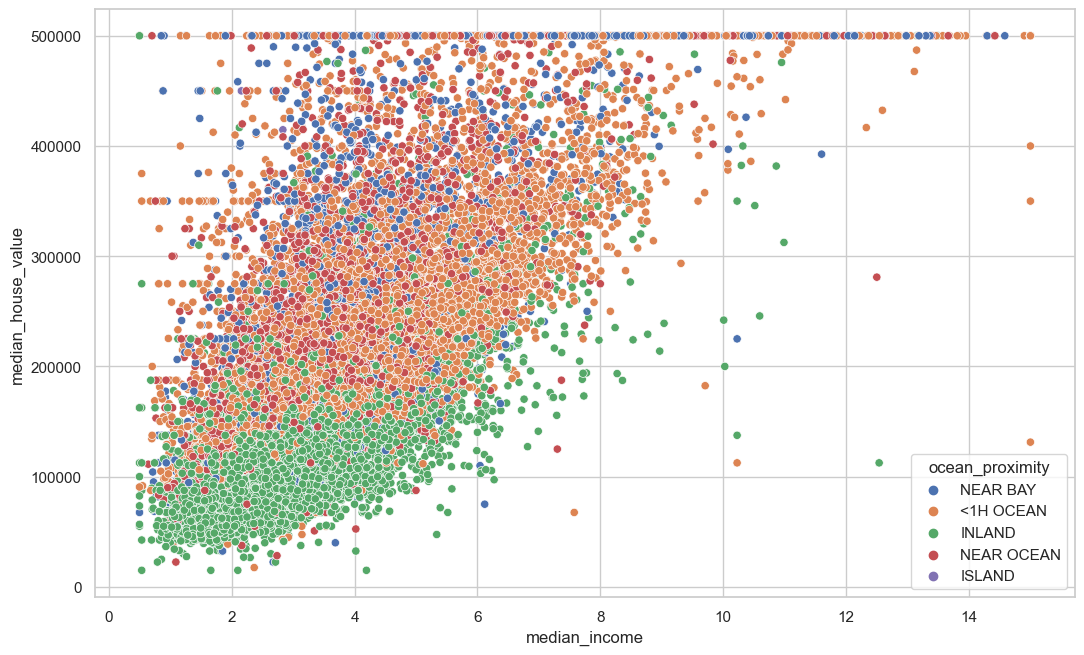

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="median_income", y="median_house_value", hue="ocean_proximity")


In [19]:
plt.style.use('_mpl-gallery-nogrid')

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [21]:
def age_range_and_count(df):
    ages = df["housing_median_age"]
    age_min = ages.min()
    age_max = ages.max()
    age_range = age_max - age_min
    age_count = len(ages)
    return age_range, age_count

In [22]:
age_range, age_count = age_range_and_count(df)
print("Age range:", age_range)
print("Age count:", age_count)

Age range: 51.0
Age count: 20640


Text(0.5, 1.0, 'Hexbin Plot of Housing Median Age vs Median House Value')

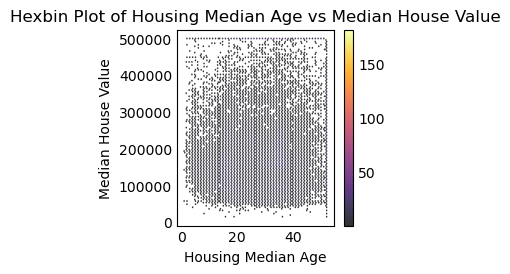

In [23]:
x = df["housing_median_age"]
y = df["median_house_value"]

# Define the hexbin plot using plt.hexbin
hb = plt.hexbin(x, y, gridsize=100, cmap="inferno", mincnt=1,alpha=0.8, edgecolors="none")
1

# Add a colorbar to the plot
cb = plt.colorbar(hb)

# Set the labels and title
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Hexbin Plot of Housing Median Age vs Median House Value")

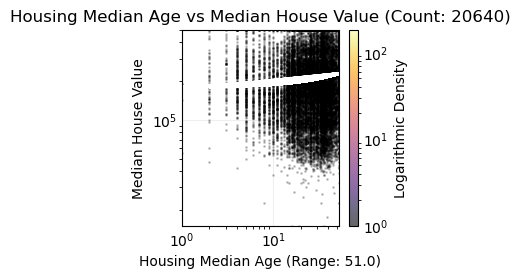

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the columns we want to plot
x = df["housing_median_age"]
y = df["median_house_value"]

# Calculate age range and count
age_min = x.min()
age_max = x.max()
age_range = age_max - age_min
age_count = len(x)

# Create hexbin plot
hb = plt.hexbin(x, y, gridsize=100, cmap="inferno", bins="log", mincnt=1, alpha=0.6, edgecolors="none")
cb = plt.colorbar(hb)

# Add scatter plot of data points
plt.scatter(x, y, s=1, color="black", alpha=0.2)

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="white", linewidth=2)

# Set axis labels and title
plt.xlabel("Housing Median Age (Range: {})".format(age_range))
plt.ylabel("Median House Value")
plt.title("Housing Median Age vs Median House Value (Count: {})".format(age_count))

# Set logarithmic color scale
cb.set_label("Logarithmic Density")
plt.xscale("log")
plt.yscale("log")

# Set plot limits
plt.xlim(age_min, age_max)
plt.ylim(y.min(), y.max())

# Add gridlines
plt.grid(True, alpha=0.2)

# Show the plot
plt.show()


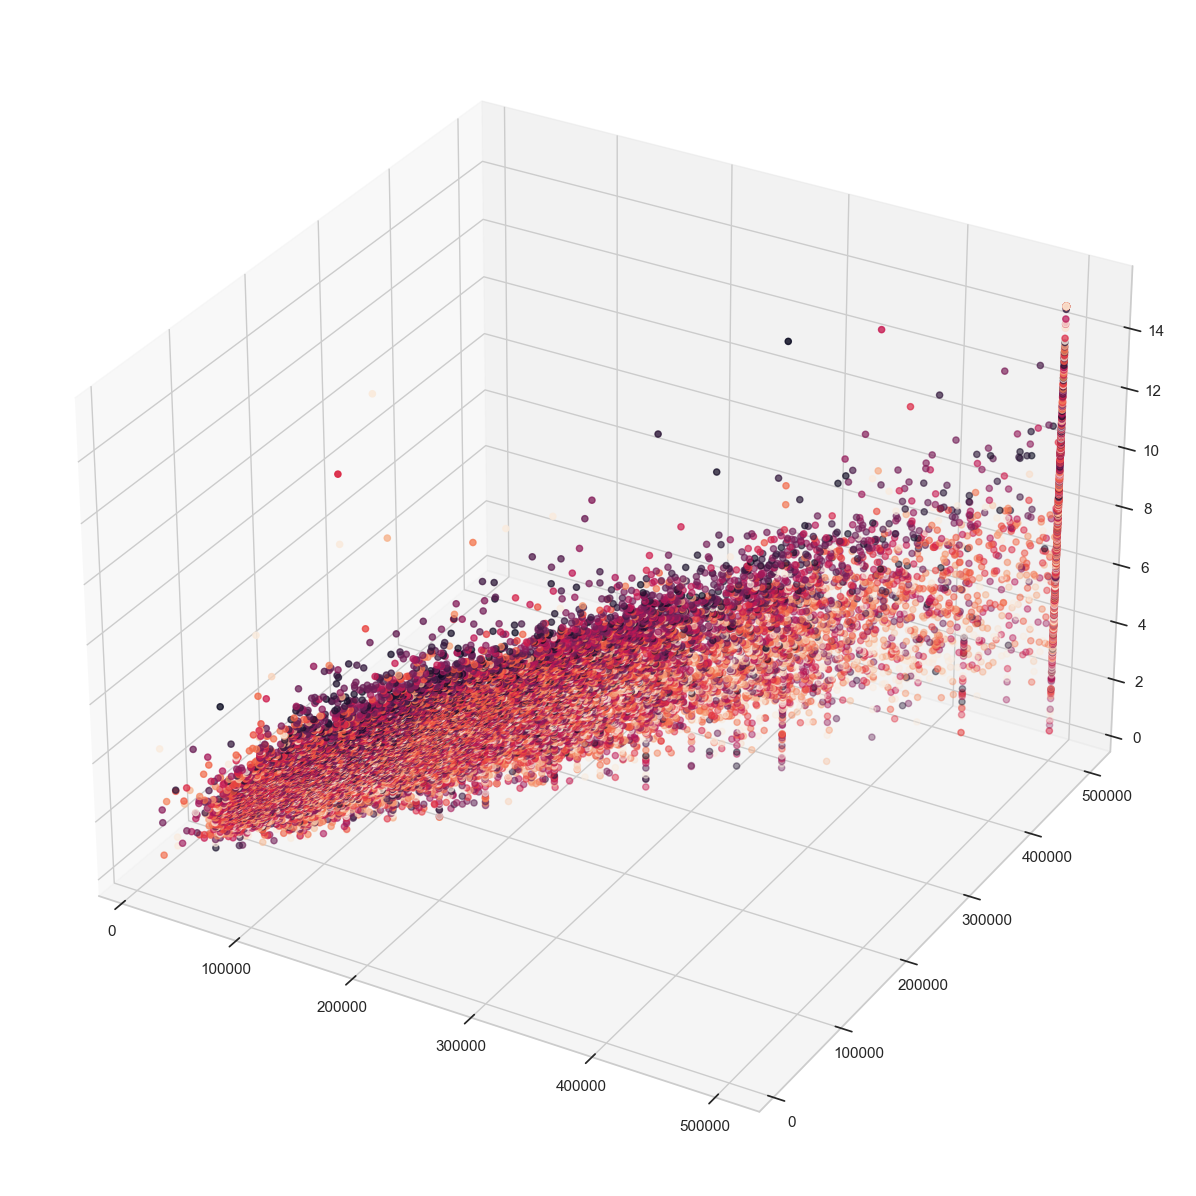

In [32]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['median_house_value'], df['median_house_value'], df['median_income'],c=x)
plt.show()